In [1]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

/Users/akramchakrouni/Projects/time-series-forecasting-cluserting/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
# data = TimeSeriesDataFrame.from_path(
#     r"/Users/akramchakrouni/Projects/time-series-forecasting-cluserting/clusters_appended_ts/embeddings/cluster_0_combined.parquet"
# )
# data.head()

In [16]:
data = TimeSeriesDataFrame.from_path(
    "https://autogluon.s3.amazonaws.com/datasets/timeseries/australian_electricity_subset/test.csv"
)
data.head()

target
item_id timestamp                       
T000000 2013-03-10 00:00:00  5207.959961
        2013-03-10 00:30:00  5002.275879
        2013-03-10 01:00:00  4747.569824
        2013-03-10 01:30:00  4544.880859
        2013-03-10 02:00:00  4425.952148

In [24]:
data.loc["T000004"].shape

(34608, 1)

In [17]:
prediction_length = 48
train_data, test_data = data.train_test_split(prediction_length)

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="bolt_small",
)

Sorting the dataframe index before generating the train/test split.
Beginning AutoGluon training...
AutoGluon will save models to '/Users/akramchakrouni/Projects/time-series-forecasting-cluserting/notebooks/akram/AutogluonModels/ag-20250328_105321'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:24 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6030
CPU Count:          11
GPU Count:          0
Memory Avail:       7.05 GB / 18.00 GB (39.2%)
Disk Space Avail:   383.95 GB / 460.43 GB (83.4%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 1

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


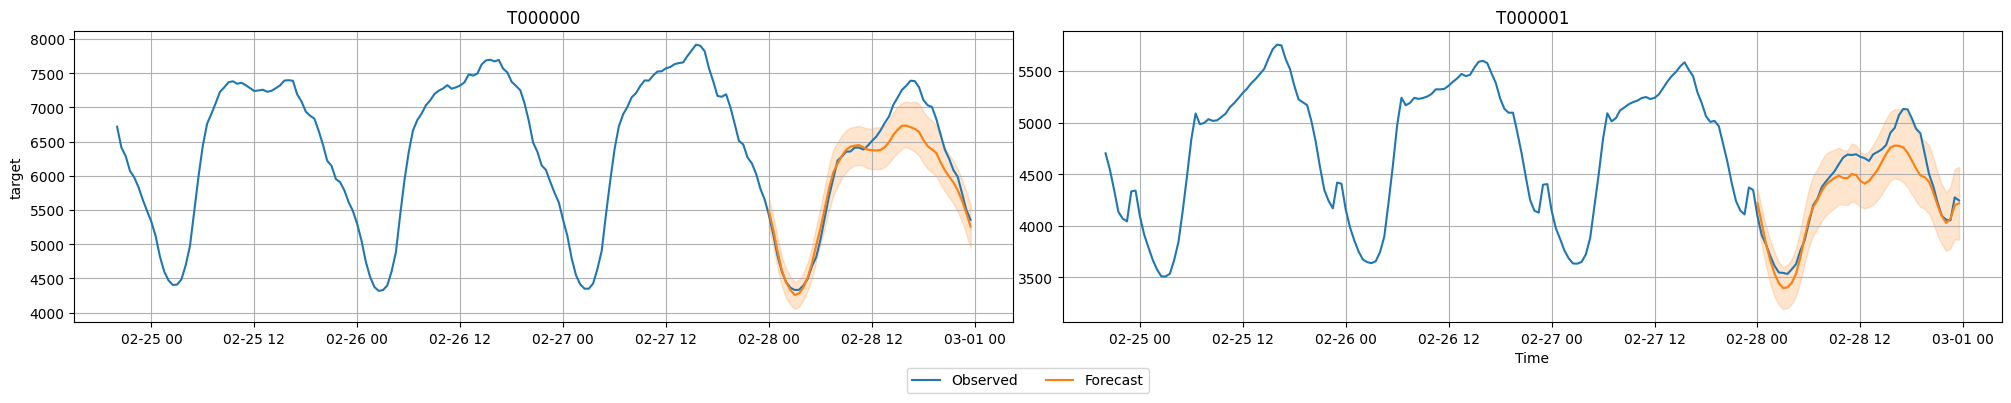

In [25]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
);